In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv

In [26]:
co_pop = 5758736

filename = "./data/covid19_vaccine_2021-04-08.csv"
df = pd.read_csv(filename)
# print(df.loc[(df["metric"] == "Cumulative Daily") & (df["type"] == "All COVID Vaccines")])
new = df.loc[(df["metric"] == "Cumulative Daily") & (df["type"] == "All COVID Vaccines")][["date", "value"]].copy()
new.date = pd.to_datetime(new['date'], format="%Y-%m-%d")
new = new.loc[new["date"] >= np.datetime64("2020-12-14")]
new.set_index(['date'], inplace=True)
new.rename(columns={"value": "# vaccinated"}, inplace=True)
new["percent of population"] = new.apply(lambda x: x / co_pop)

print(new.head())

            # vaccinated  percent of population
date                                           
2020-12-14         192.0               0.000033
2020-12-15         425.0               0.000074
2020-12-16        4234.0               0.000735
2020-12-17       16470.0               0.002860
2020-12-18       28704.0               0.004984


<AxesSubplot:label='0ee928cb-fa17-4735-9f1e-85547f7b6cc4'>

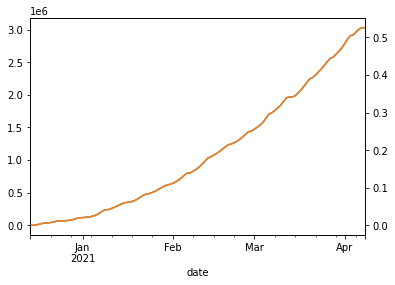

In [27]:
plt.close("all")
plt.figure()
new["# vaccinated"].plot()
new['percent of population'].plot(secondary_y=True)

In [28]:
filename = "./data/covid19_cases_demographics_tests_2021-04-15.csv"
df = pd.read_csv(filename)
# df.date = pd.to_datetime(df['date'], format="%Y-%m-%d")
# df.set_index(['date'], inplace=True)
print(df.columns)
df.tail()

Index(['section', 'category', 'description', 'date', 'metric', 'value'], dtype='object')


,section,category,description,date,metric,value
14106,Tests,Teller County,"Total COVID-19 Testing Rate per 100,000 People...",NaN,"Rate per 100,000",89174.0
14107,Tests,Unknown County,"Total COVID-19 Testing Rate per 100,000 People...",NaN,"Rate per 100,000",NaN
14108,Tests,Washington County,"Total COVID-19 Testing Rate per 100,000 People...",NaN,"Rate per 100,000",130198.0
14109,Tests,Weld County,"Total COVID-19 Testing Rate per 100,000 People...",NaN,"Rate per 100,000",111539.0
14110,Tests,Yuma County,"Total COVID-19 Testing Rate per 100,000 People...",NaN,"Rate per 100,000",96124.0


In [39]:
cases_by_date = df.loc[(df["description"] == "Cases of COVID-19 in Colorado by Date of Illness Onset") & (df["metric"] == "Counts")][["date", "value"]]
cases_by_date["date"] = pd.to_datetime(cases_by_date['date'], format="%Y-%m-%d")
cases_by_date_pre_vax = cases_by_date.loc[cases_by_date["date"] < np.datetime64("2020-12-14")]
cases_by_date_pre_vax.set_index(['date'], inplace=True)
# cases_by_date_pre_vax.head()
 
cases_cumulative = df.loc[(df["description"] == "Cumulative COVID-19 Cases in Colorado by Date of Illness Onset") & (df["metric"] == "Cumulative")][["date", "value"]]
cases_cumulative["date"] = pd.to_datetime(cases_cumulative['date'], format="%Y-%m-%d")
cases_cumulative_pre_vax = cases_cumulative.loc[cases_cumulative["date"] < np.datetime64("2020-12-14")]
cases_cumulative_pre_vax.set_index(['date'], inplace=True)
cases_cumulative_pre_vax.rename(columns = {"value": "cumulative"}, inplace=True)
# cases_cumulative_pre_vax.head()
 
cases_by_date_pre_vax = cases_by_date_pre_vax.join(cases_cumulative_pre_vax)

/home/kaleb/.local/lib/python3.6/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


array([<AxesSubplot:xlabel='date'>, <AxesSubplot:xlabel='date'>],
      dtype=object)

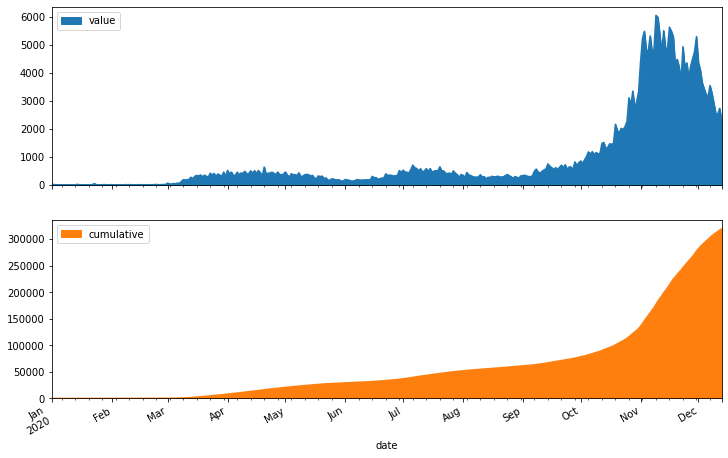

In [42]:
plt.close("all")
cases_by_date_pre_vax.plot.area(figsize=(12, 8), subplots=True)

In [43]:
# cases_by_date = df.loc[(df["description"] == "Cases of COVID-19 in Colorado by Date of Illness Onset") & (df["metric"] == "Counts")][["date", "value"]]
# cases_by_date["date"] = pd.to_datetime(cases_by_date['date'], format="%Y-%m-%d")
cases_by_date_post_vax = cases_by_date.loc[cases_by_date["date"] >= np.datetime64("2020-12-14")]
cases_by_date_post_vax.set_index(['date'], inplace=True)
# cases_by_date_pre_vax.head()
 
cases_cumulative_post_vax = cases_cumulative.loc[cases_cumulative["date"] >= np.datetime64("2020-12-14")]
cases_cumulative_post_vax.set_index(['date'], inplace=True)
cases_cumulative_post_vax.rename(columns = {"value": "cumulative"}, inplace=True)
# cases_cumulative_pre_vax.head()
 
cases_by_date_post_vax = cases_by_date_post_vax.join(cases_cumulative_post_vax)

/home/kaleb/.local/lib/python3.6/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


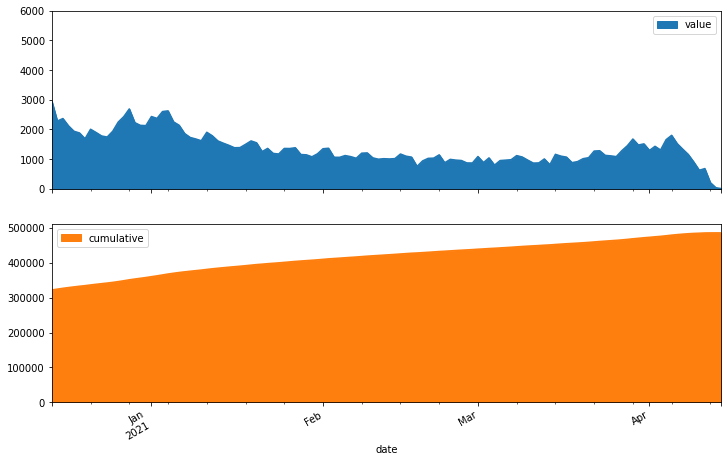

In [56]:
plt.close("all")
fig1, fig2 = cases_by_date_post_vax.plot.area(figsize=(12, 8), subplots=True)
fig1.set_ybound(0, 6000)